In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default, horiz_merge
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import Image
from fluentopt.utils import flatten_dict
import seaborn as sns
from scipy.stats import binned_statistic
pd.options.display.max_columns = 100
sns.set_style('white')

def show_several(df):
    for j in df.index:
        print(j)
        show_one(j)
def show_one(j):
    try:
        X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:100]
    except Exception:
        return
    X = grid_of_images_default(X)
    imsave('out.png', X)
    im = Image('out.png')
    display(im)

In [100]:
df_full = pd.read_csv('../../export/hypers.csv')
df_full = df_full.set_index('job_id')

In [101]:
labels = [
    'emnist_digits_count',
    'emnist_letters_count',
    'digits_count', 
    'letters_count', 
    'digits_objectness', 
    'letters_objectness', 
    'digits_and_letters_objectness', 
    'emnist_objectness',
    'ratio_unique',
    'innovative',
    'existing',
    'noisy',
]

d = df_full[labels].corr()
def m(val):
    color = 'yellow' if abs(val) > 0.8 else 'red' if abs(val) < 0.2 else 'white'
    return 'background-color: %s' % color

d = d.style.applymap(m)
d

,emnist_digits_count,emnist_letters_count,digits_count,letters_count,digits_objectness,letters_objectness,digits_and_letters_objectness,emnist_objectness,ratio_unique,innovative,existing,noisy
emnist_digits_count,1,-0.235975,0.525396,-0.46789,0.392373,0.197751,-0.0300961,0.310398,0.1942,0.154408,0.318362,-0.44662
emnist_letters_count,-0.235975,1,-0.253026,0.354671,0.429249,0.547362,0.708894,0.452754,0.695972,0.38072,-0.980502,0.0755934
digits_count,0.525396,-0.253026,1,-0.908131,0.462711,0.343477,-0.0917143,0.423437,0.16139,0.363867,0.353965,-0.61853
letters_count,-0.46789,0.354671,-0.908131,1,-0.379571,-0.259127,0.171218,-0.343562,-0.0601016,-0.30015,-0.444122,0.584091
digits_objectness,0.392373,0.429249,0.462711,-0.379571,1,0.910955,0.663946,0.952186,0.876319,0.815943,-0.2839,-0.780229
letters_objectness,0.197751,0.547362,0.343477,-0.259127,0.910955,1,0.810189,0.946748,0.847799,0.944397,-0.393126,-0.777521
digits_and_letters_objectness,-0.0300961,0.708894,-0.0917143,0.171218,0.663946,0.810189,1,0.706876,0.803982,0.692004,-0.608596,-0.403091
emnist_objectness,0.310398,0.452754,0.423437,-0.343562,0.952186,0.946748,0.706876,1,0.841306,0.893396,-0.302646,-0.803018
ratio_unique,0.1942,0.695972,0.16139,-0.0601016,0.876319,0.847799,0.803982,0.841306,1,0.683755,-0.59613,-0.486926
innovative,0.154408,0.38072,0.363867,-0.30015,0.815943,0.944397,0.692004,0.893396,0.683755,1,-0.296106,-0.700629


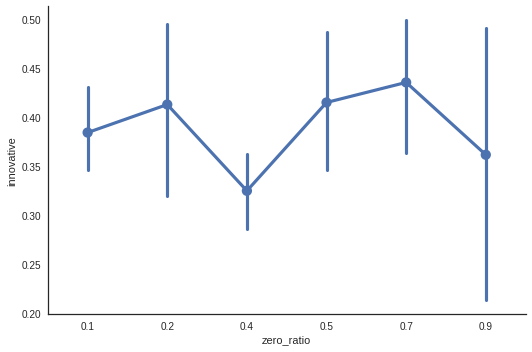

In [102]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
#df = df[df['nb_layers']==3]
#df = df[df['stride'] == 1]
#df = df[df['zero_ratio']!=0.4]
df = df.sort_values(by='zero_ratio')
sns.factorplot(x='zero_ratio', y='innovative', data=df, size=5, aspect=1.5)
#show_several(df)

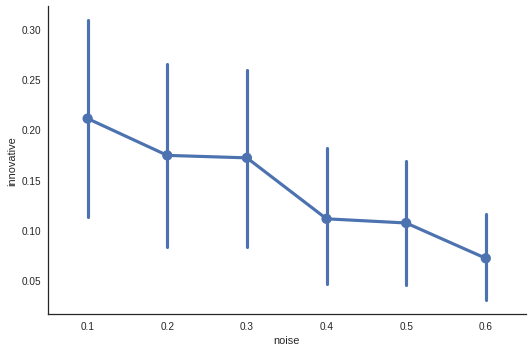

In [104]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
#df = df[df['nb_layers']==3]
df = df[df['noise']<=0.6]
df = df.sort_values(by='noise')
sns.factorplot(x='noise', y='innovative', data=df, size=5, aspect=1.5)
#show_several(df)

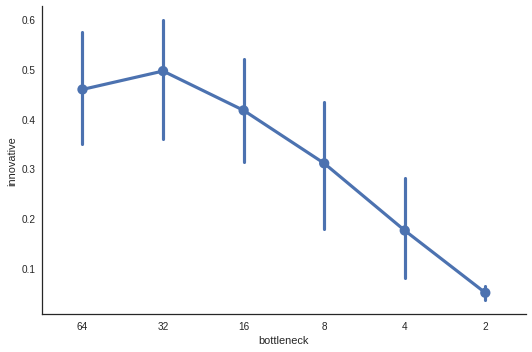

In [105]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
#df  = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)
sns.factorplot(x='bottleneck', y='innovative', data=df, order=[64, 32, 16, 8, 4, 2], size=5, aspect=1.5)
#show_several(df)

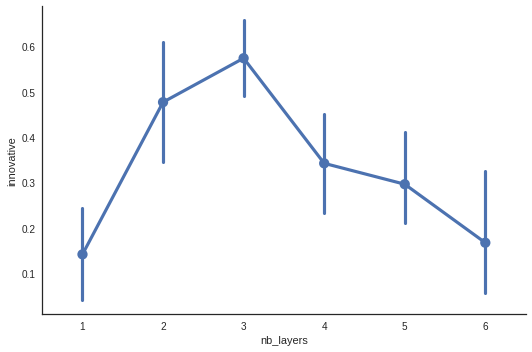

In [106]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
#df = df[df['stride']==1]
sns.factorplot(x='nb_layers', y='innovative', data=df, size=5, aspect=1.5)

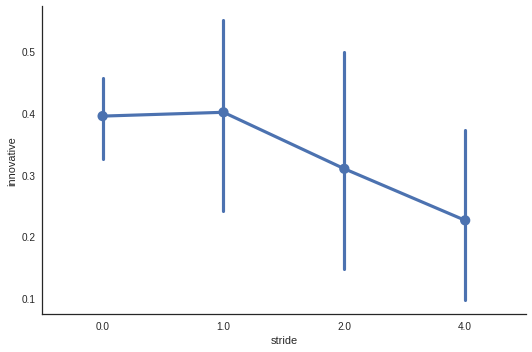

In [107]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
sns.factorplot(x='stride', y='innovative', data=df, size=5, aspect=1.5)

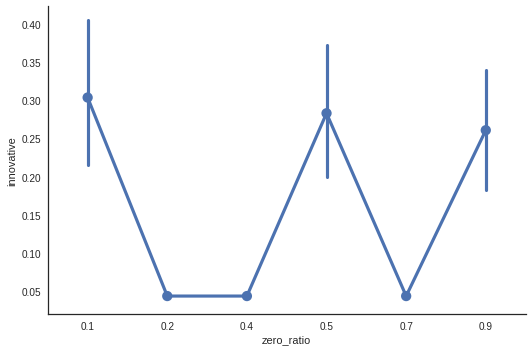

In [108]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel_stride']
#df = df[df['nb_layers']==2]
#df = df[df['stride'] == 2]
#df = df[df['zero_ratio']!=0.4]
df = df.sort_values(by='zero_ratio')
sns.factorplot(x='zero_ratio', y='innovative', data=df, size=5, aspect=1.5)
#show_several(df)